In [1]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import norm

%config InlineBackend.figure_format='retina'

In [2]:
root = Path('./main/report/one_class')
semi_path = root / 'satellite_one_class_epoch-500' / 'result_df_add.pkl'
un_path = root / 'satellite_one_class_unsupervised_epoch-500' / 'result_df_add.pkl'

In [3]:
semi_df = pd.read_pickle(semi_path)
un_df = pd.read_pickle(un_path)

In [4]:
semi_df_0 = semi_df[semi_df.labels == 0]['scores']
semi_df_1 = semi_df[semi_df.labels == 1]['scores']
un_df_0 = un_df[un_df.labels == 0]['scores']
un_df_1 = un_df[un_df.labels == 1]['scores']

In [14]:
semi_cut = semi_df_0.quantile(0.90)
semi_predicted = [1 if e > semi_cut else 0 for e in semi_df_1.values]
semi_recall = round(sum(semi_predicted) / len(semi_predicted), 2)

un_cut = un_df_0.quantile(0.90)
un_predicted = [1 if e > un_cut else 0 for e in un_df_1.values]
un_recall = round(sum(un_predicted) / len(un_predicted), 2)

print(f'Recall for unsupervised model: {un_recall}.')
print(f'Recall for semi-supervised model: {semi_recall}.')

Recall for unsupervised model: 0.04.
Recall for semi-supervised model: 0.88.


# 1. CDF Plot for Anomaly Scores

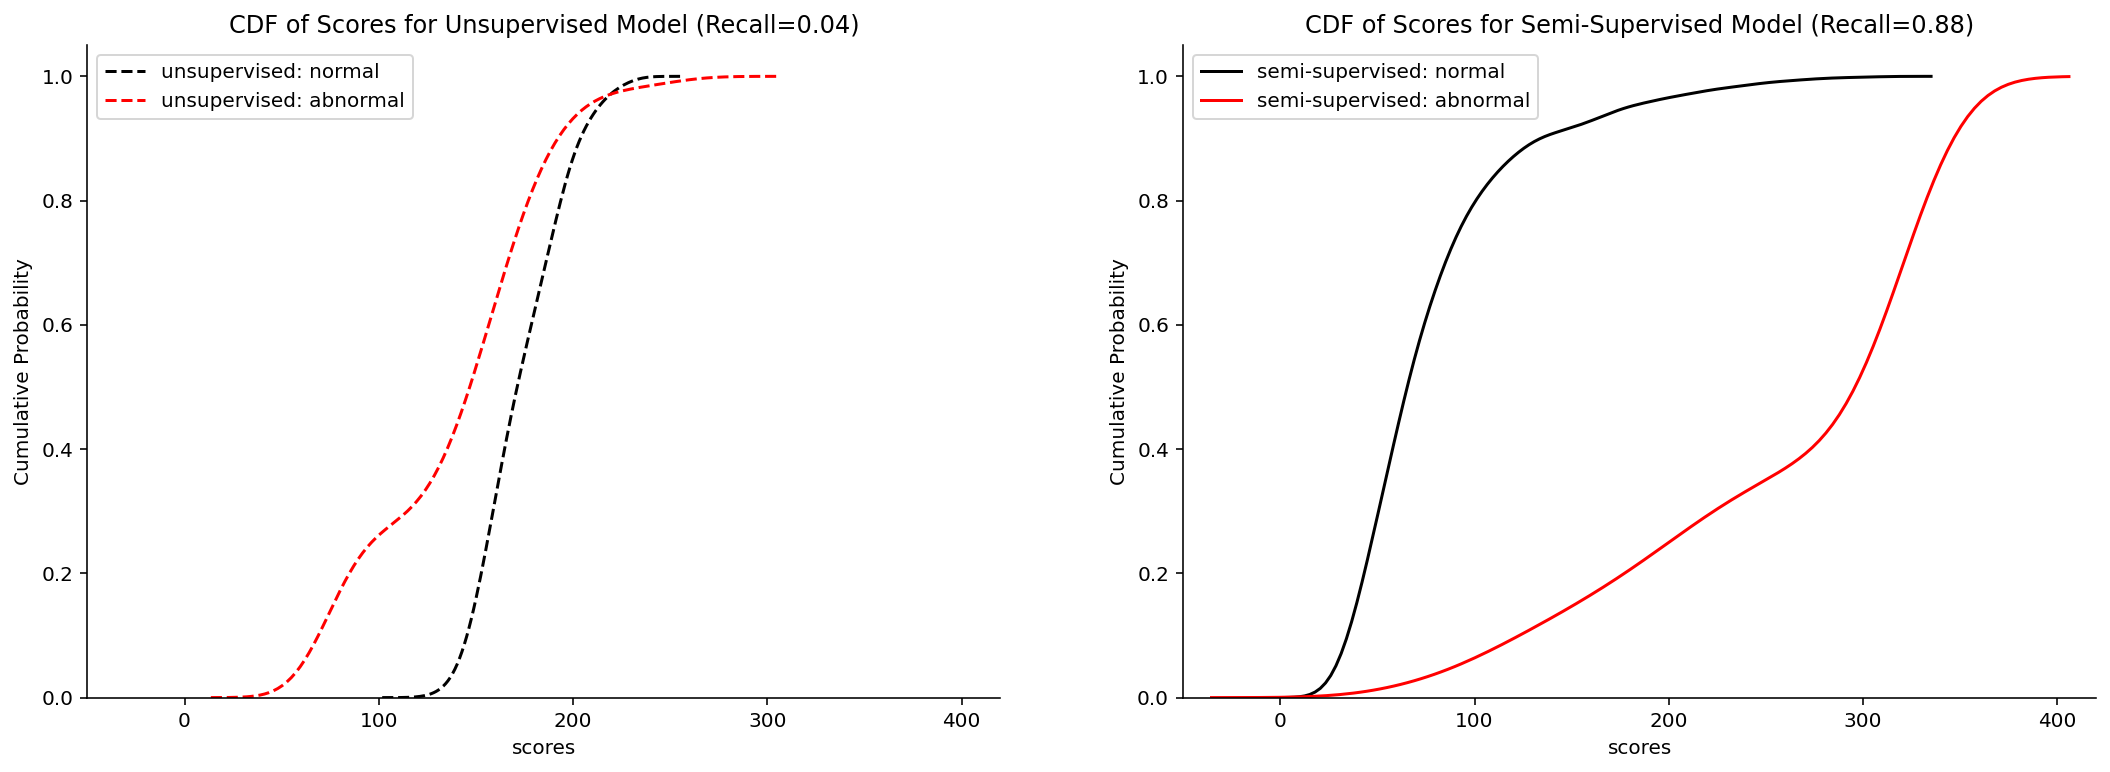

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(18, 6))

kws = {'cumulative': True}
kws_un = {'cumulative': True, 'linestyle':'--'}

sea.distplot(un_df_0, hist=False, color='black', label='unsupervised: normal', kde_kws=kws_un, ax=ax1)
sea.distplot(un_df_1, hist=False, color='red', label='unsupervised: abnormal', kde_kws=kws_un, ax=ax1)
ax1.set_title(f'CDF of Scores for Unsupervised Model (Recall={un_recall})')
ax1.set_ylabel('Cumulative Probability')

sea.distplot(semi_df_0, hist=False, color='black', label='semi-supervised: normal', kde_kws=kws, ax=ax2)
sea.distplot(semi_df_1, hist=False, color='red', label='semi-supervised: abnormal', kde_kws=kws, ax=ax2)
ax2.set_title(f'CDF of Scores for Semi-Supervised Model (Recall={semi_recall})')
ax2.set_ylabel('Cumulative Probability')

ax1.set_xlim(-50, 420)
ax2.set_xlim(-50, 420)
sea.despine()

# 2. PDF Plot for Anomaly Scores

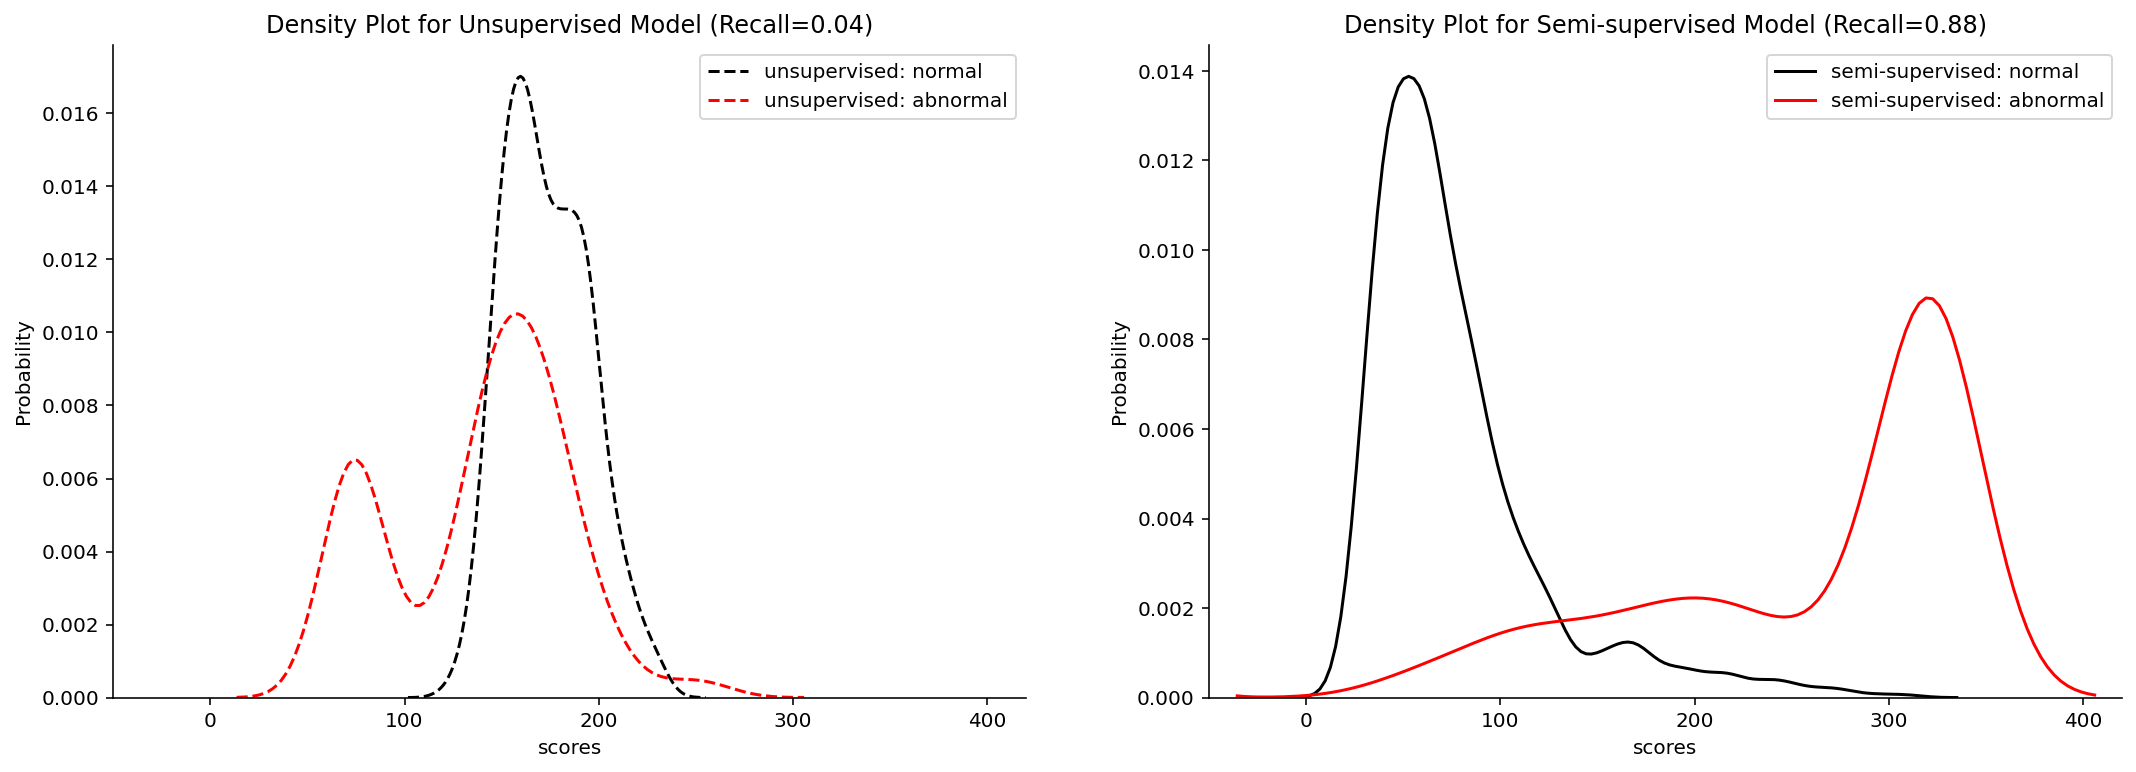

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(18, 6))

sea.distplot(un_df_0, hist=False, color='black', label='unsupervised: normal', ax=ax1, kde_kws={'linestyle':'--'})
sea.distplot(un_df_1, hist=False, color='red', label='unsupervised: abnormal', ax=ax1, kde_kws={'linestyle':'--'})
ax1.set_title(f'Density Plot for Unsupervised Model (Recall={un_recall})')
ax1.set_ylabel('Probability')

sea.distplot(semi_df_0, hist=False, color='black', label='semi-supervised: normal', ax=ax2)
sea.distplot(semi_df_1, hist=False, color='red', label='semi-supervised: abnormal', ax=ax2)
ax2.set_title(f'Density Plot for Semi-supervised Model (Recall={semi_recall})')
ax2.set_ylabel('Probability')

ax1.set_xlim(-50, 420)
ax2.set_xlim(-50, 420)
sea.despine()

# 3. PDF Plot for Score Differences $Delta(x)$

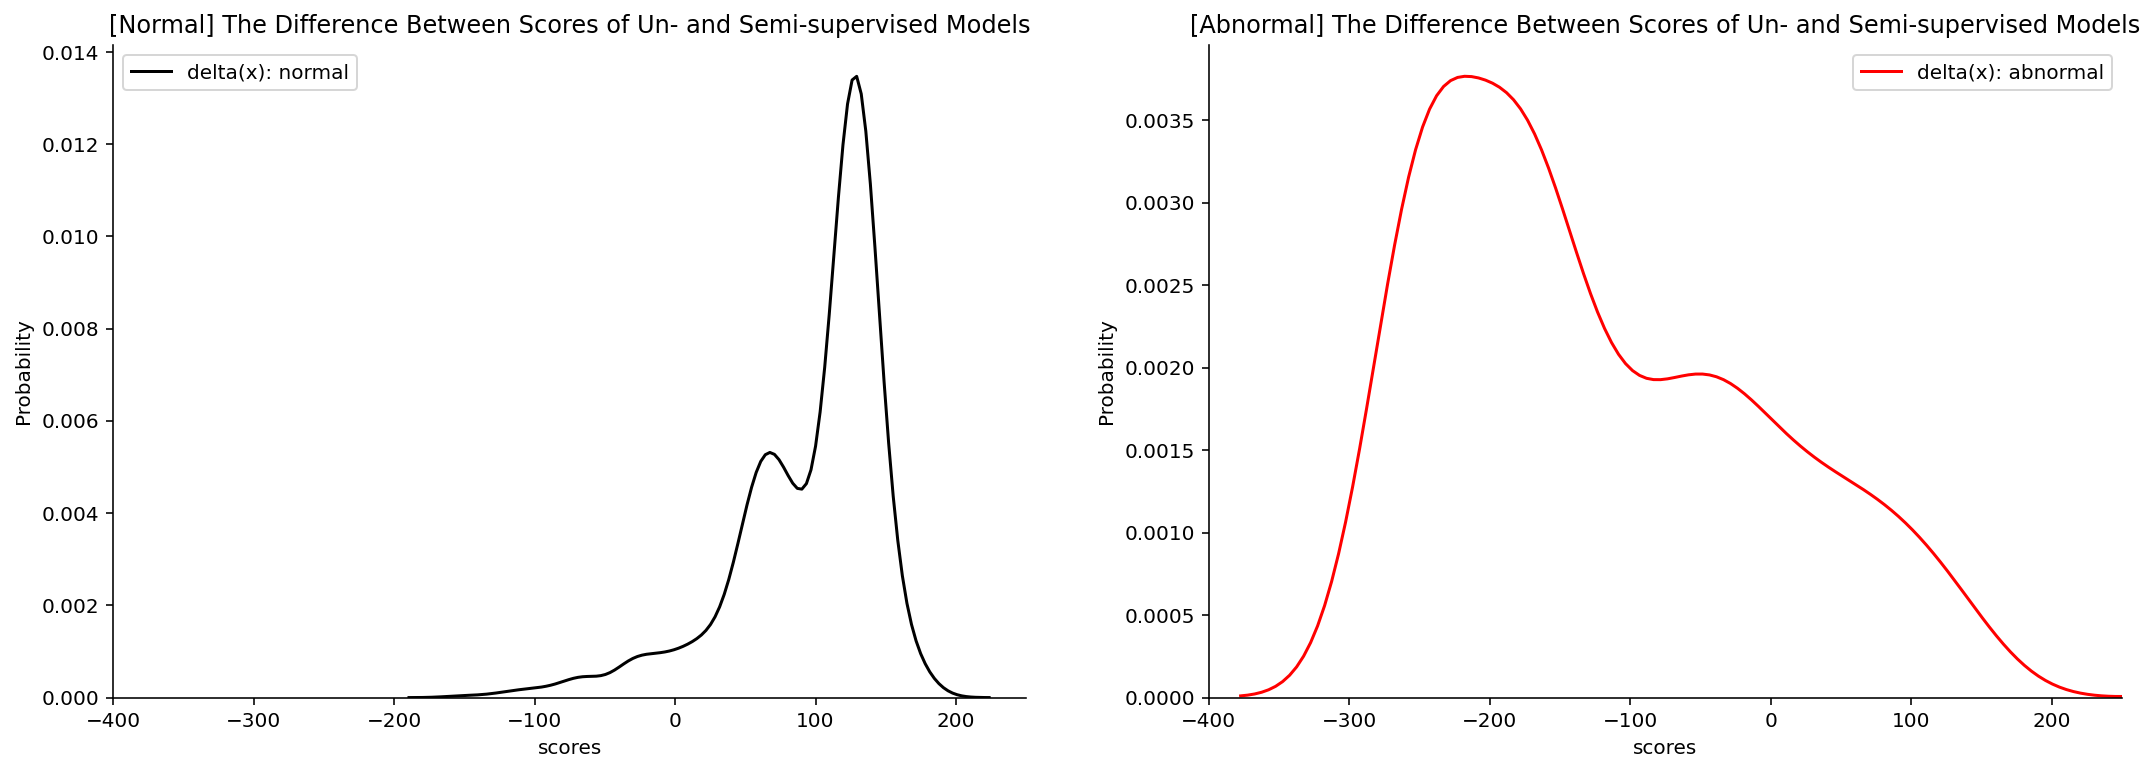

In [18]:
fig_, (ax3, ax4) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(18, 6))
sea.distplot(un_df_0 - semi_df_0, hist=False, color='black', label='delta(x): normal', ax=ax3)
sea.distplot(un_df_1 - semi_df_1, hist=False, color='red', label='delta(x): abnormal', ax=ax4)

ax3.set_title('[Normal] The Difference Between Scores of Un- and Semi-supervised Models')
ax4.set_title('[Abnormal] The Difference Between Scores of Un- and Semi-supervised Models')
ax3.set_ylabel('Probability')
ax4.set_ylabel('Probability')

ax3.set_xlim(- 400, 250)
ax4.set_xlim(- 400, 250)
sea.despine()